<a href="https://colab.research.google.com/github/paulagm12/DSPS_PGalvezMolina/blob/main/HW9_PGalvezMolina/PGalvezMolina_HW9_higgsbosonSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pylab as pl
import os
%pylab inline
import json
import pandas as pd
import missingno as msno

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Populating the interactive namespace from numpy and matplotlib


In [2]:
cd /content/drive/MyDrive/DSPS2023

/content/drive/MyDrive/DSPS2023


In [3]:
# !mv kaggle.json .kaggle.json

In [4]:
# DO NOT RUN AGAIN, this edits the permissions
# !chmod 600 .kaggle.json

In [5]:
# ls .kag*

In [6]:
# !ls -l .kag*

In [7]:
# envs = json.load(open(".kaggle.json", "r"))
# os.environ["KAGGLE_USERNAME"] = envs['username']
# os.environ["KAGGLE_KEY"] = envs['key']

In [8]:

#check that it worked by listing the kaggle datasets
# !kaggle datasets list

In [9]:
cd /content/drive/MyDrive/DSPS2023

/content/drive/MyDrive/DSPS2023


In [10]:
#create a directory for these data
# !mkdir kaggleHiggsBosson

In [11]:
#move to that directory
!cd /content/drive/MyDrive/DSPS2023/kaggleHiggsBosson

In [12]:
pwd

'/content/drive/MyDrive/DSPS2023'

In [13]:
# !kaggle competitions download -c higgs-boson

In [14]:
!unzip /content/drive/MyDrive/DSPS2023/kaggleHiggsBosson/higgs-boson.zip

Archive:  /content/drive/MyDrive/DSPS2023/kaggleHiggsBosson/higgs-boson.zip
replace HiggsBosonCompetition_AMSMetric_rev1.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [15]:
!unzip training.zip

Archive:  training.zip
replace training.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [16]:
# higgsdata = pd.read_csv("train.csv").dropna(subset=["Survived", "Sex", "Pclass", "Age"])
higgsdata = pd.read_csv("training.csv")

In [17]:
higgsdata.isnull().values.any()

False

- Download the Higgs boson data from Kaggle (programmatically within the notebook)
see how I did it in the Titanic Trees notebook https://github.com/fedhere/DSPS_FBianco/blob/main/CodeDemos/titanictree.ipynb

find the correct API link here https://www.kaggle.com/c/higgs-boson/data



- Read in the trainind data. Split the provided training data into a training and a test set.
The last 2 columns are what you want to predict: "weight" and "label".
Remove them from the input data and create a separate variable label and a separate variable weight, which will be your target variables for, respectively, classification and regression.



In [18]:
higgsdata.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [19]:
higgsdata.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,...,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,...,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


In [20]:
higgsdataNAN=higgsdata.replace(-999, np.nan)

<Axes: >

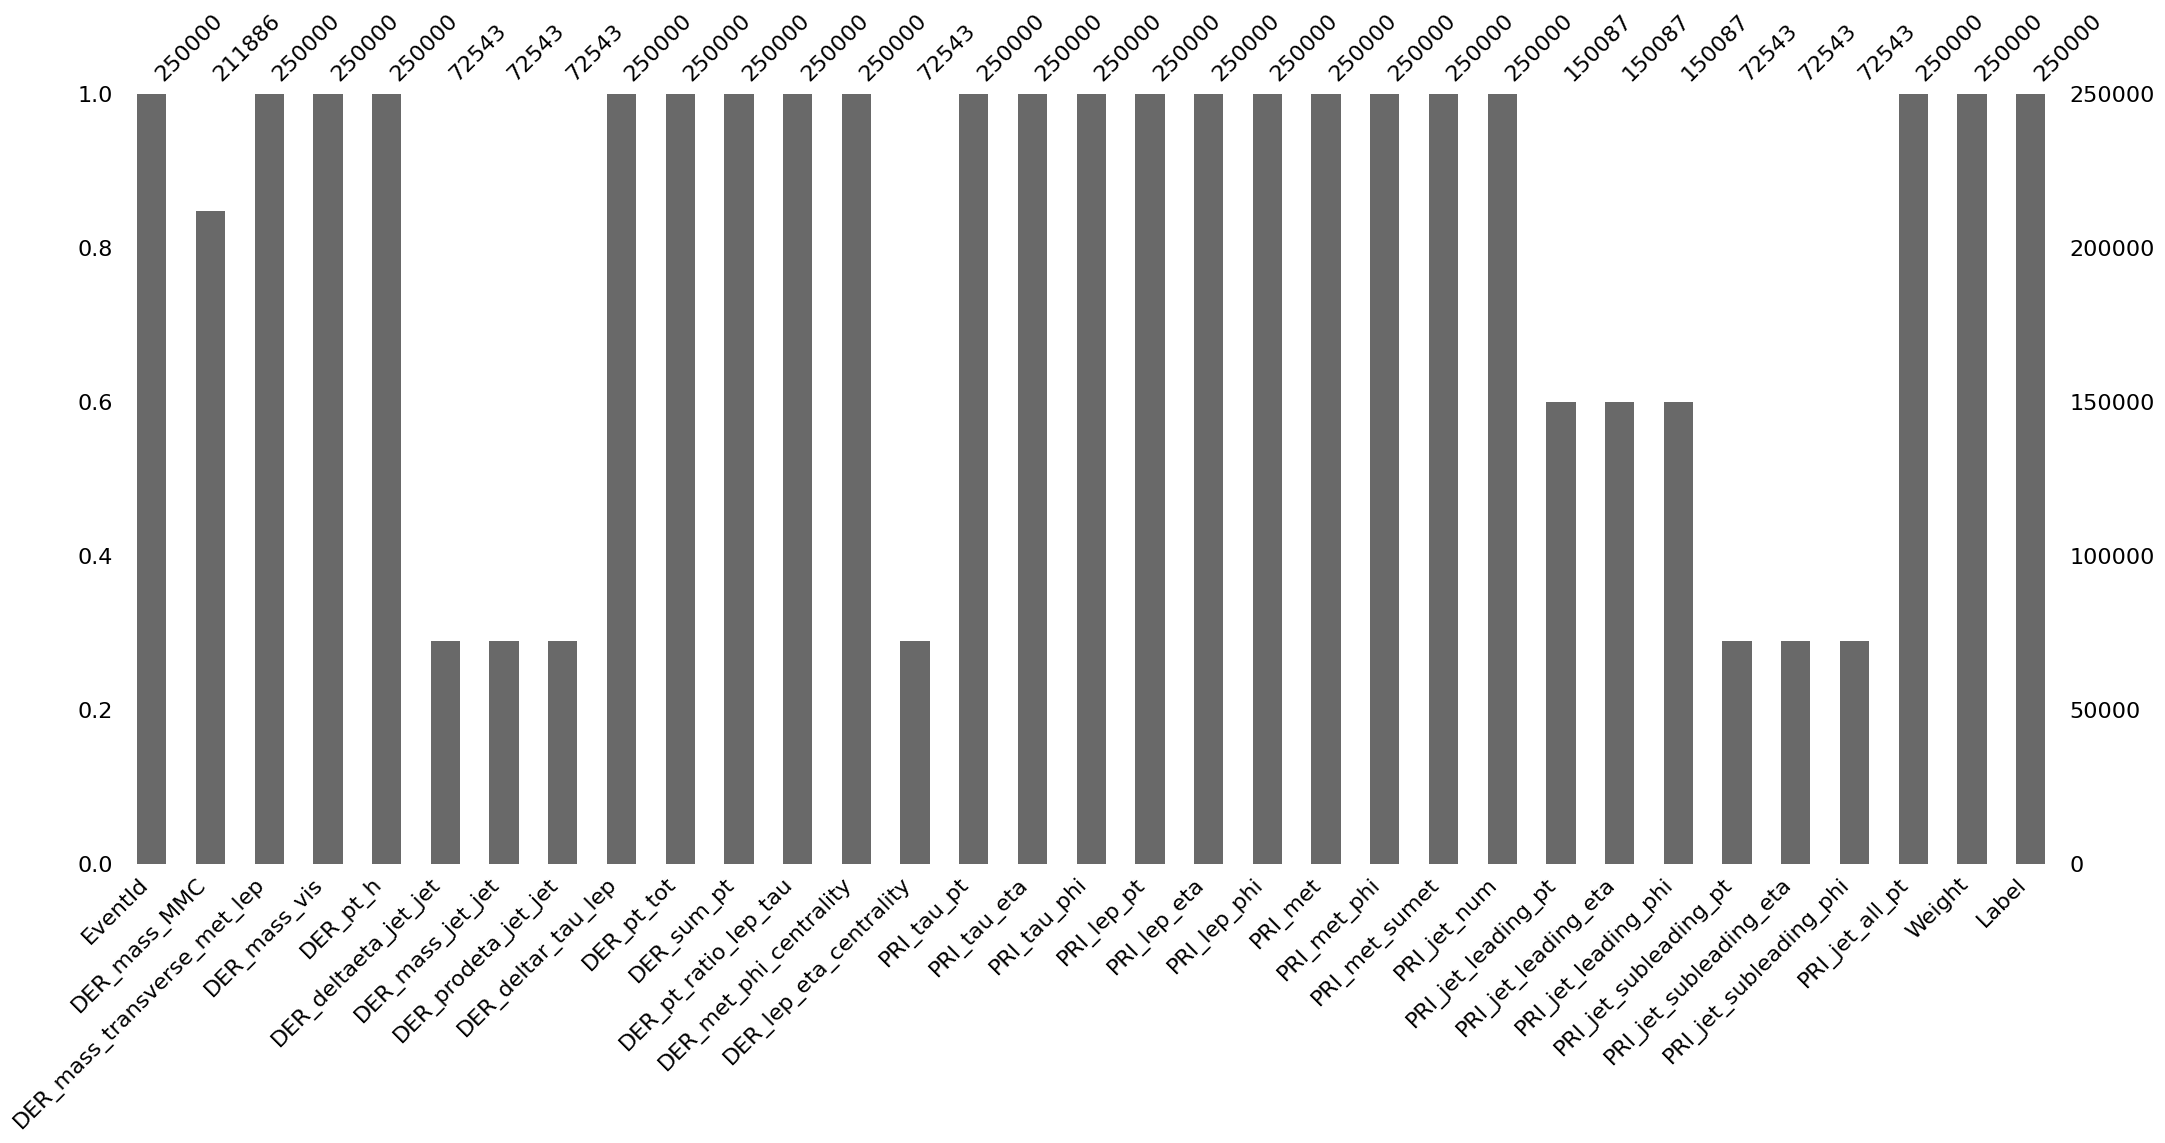

In [21]:
# msno.matrix(higgsdataNAN)
msno.bar(higgsdataNAN)
# msno.heatmap(higgsdataNAN)

## **Fig 1.** Bar plot of number of values that are not NaN. This shows that there are 10 columns with a considerable amount of features with missing values and one (DER_mass_MMC) with some data points missing.

### Here is where we had the discussion about dropping column versus rows. I chose to not drop the extra feature.

In [22]:
# Dropping the columns from the original data set and eliminating the rows (method 2)
higgsdata.drop(columns = ["DER_deltaeta_jet_jet", "DER_mass_jet_jet", "DER_prodeta_jet_jet", "DER_lep_eta_centrality", "PRI_jet_subleading_pt", "PRI_jet_subleading_eta", "PRI_jet_subleading_phi", "PRI_jet_leading_pt", "PRI_jet_leading_eta", "PRI_jet_leading_phi"], inplace = True)
higgsdata = higgsdata[~higgsdata.isin([-999.000]).any(axis=1)]

In [23]:
higgsdata.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,...,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_all_pt,Weight
count,211886.000000,211886.000000,211886.000000,211886.000000,211886.000000,211886.000000,211886.000000,211886.000000,211886.000000,211886.000000,...,211886.000000,211886.000000,211886.000000,211886.000000,211886.000000,211886.000000,211886.000000,211886.000000,211886.000000,211886.000000
mean,225059.477040,121.858528,42.001020,82.305844,63.228131,2.430013,19.338716,167.645039,1.428344,0.053725,...,-0.012684,47.208877,-0.014290,0.043263,38.261579,-0.004367,221.226658,1.070845,80.779081,1.375498
std,72181.972028,57.298157,30.825474,39.039936,65.765518,0.765918,21.907415,119.000718,0.859173,1.191099,...,1.816221,22.362090,1.249668,1.815649,32.651768,1.813294,128.695520,0.978572,101.011020,1.742677
min,100000.000000,9.044000,0.000000,7.120000,0.000000,0.224000,0.000000,46.104000,0.047000,-1.414000,...,-3.142000,26.000000,-2.505000,-3.142000,0.109000,-3.142000,13.678000,0.000000,0.000000,0.001502
25%,162529.750000,91.885250,15.751000,61.290000,20.710000,1.898000,3.045000,84.118000,0.859000,-1.346000,...,-1.576000,32.557000,-0.984000,-1.519000,19.272000,-1.570000,133.061000,0.000000,0.000000,0.018636
50%,225107.500000,112.406000,37.649000,74.791500,43.582000,2.575000,14.331000,130.873000,1.259000,0.315000,...,-0.043000,41.010000,-0.036000,0.084000,30.656000,-0.012000,191.511500,1.000000,48.078000,0.428898
75%,287582.750000,135.482000,63.349500,92.455500,86.432500,2.993000,28.085000,212.286750,1.776000,1.293000,...,1.558000,54.235000,0.945000,1.618000,45.872000,1.566000,276.317500,2.000000,120.557500,2.140834
max,349998.000000,1192.026000,594.287000,959.601000,2834.999000,5.684000,2834.999000,1852.462000,19.773000,1.414000,...,3.142000,461.896000,2.502000,3.142000,2842.617000,3.142000,2003.976000,3.000000,1633.433000,7.822543


In [24]:
labels = np.array(higgsdata['Label'].values)

In [25]:
labels

array(['s', 'b', 'b', ..., 'b', 's', 'b'], dtype=object)

In [26]:
weights = np.array(higgsdata['Weight'].values)
weights

array([2.65331134e-03, 2.23358449e+00, 5.44637821e+00, ...,
       6.40607773e-02, 1.86361167e-02, 1.68161144e+00])

In [27]:
higgsdata.drop(columns = ["Label", "Weight"], inplace = True)

In [28]:
from sklearn.model_selection import train_test_split

- Use a Random Forest and a Gradiend Boosted Tree Classifier model to predict the label of the particles. get the score of the model on the training and test set and comment on the result for each model.


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification

# Look at parameters used by our current forest
rf = RandomForestClassifier(random_state = 0)
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [30]:
# Splitting data
data_train, data_test, labels_train, labels_test = train_test_split(higgsdata,labels, test_size=0.30, random_state=3312)

In [31]:
# Running Random Forest Classifier for  max depth of 12
rfc = RandomForestClassifier(max_depth = 12, random_state = 3312)
rfc.fit(data_train, labels_train)
rfc.predict(data_test)
print('Training score: {:.2f}'.format(rfc.score(data_train, labels_train)))
print('Test score:{:.2f}'.format(rfc.score(data_test, labels_test)))

Training score: 0.84
Test score:0.81


In [32]:
# Running Random Forest Classifier for  max depth of 15
rfc = RandomForestClassifier(max_depth = 15, random_state = 3312)
rfc.fit(data_train, labels_train)
rfc.predict(data_test)
print('Training score: {:.2f}'.format(rfc.score(data_train, labels_train)))
print('Test score:{:.2f}'.format(rfc.score(data_test, labels_test)))

Training score: 0.90
Test score:0.81


In [33]:
# Running Random Forest Classifier for  max depth of 9
rfc = RandomForestClassifier(max_depth = 9, random_state = 3312)
rfc.fit(data_train, labels_train)
label_predictRFC = rfc.predict(data_test)
print('Training score: {:.2f}'.format(rfc.score(data_train, labels_train)))
print('Test score:{:.2f}'.format(rfc.score(data_test, labels_test)))

Training score: 0.81
Test score:0.80


### It seems that out of the three classifiers I worked with, the best one is the one with a maximum depth of 12 for this method.

In [34]:
gbt = GradientBoostingClassifier(max_depth = 12, random_state = 3312)

In [35]:
# Running Gradient Boosting Tree Classifier for  max depth of 12
gbt.fit(data_train, labels_train)
gbt.predict(data_test)
print('Training score: {:.2f}'.format(gbt.score(data_train, labels_train)))
print('Test score:{:.2f}'.format(gbt.score(data_test, labels_test)))

Training score: 0.95
Test score:0.81


In [36]:
# Running Gradient Boosting Tree Classifier for  max depth of 8
gbt = GradientBoostingClassifier(max_depth = 8, random_state = 3312)
gbt.fit(data_train, labels_train)
label_predictGBC = gbt.predict(data_test)
print('Training score: {:.2f}'.format(gbt.score(data_train, labels_train)))
print('Test score:{:.2f}'.format(gbt.score(data_test, labels_test)))

Training score: 0.85
Test score:0.81


### It seems that out of the three classifiers I worked with, the best one is the one with a maximum depth of 8 for this method.

- Produce a confusion matrix for each model and compare them






In [37]:

# I creaded this function (mostly copied from sklearn examples).
# You can use it to create the confusion matrix
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title='',
                          cmap=pl.cm.bone):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
          title = title + ' Normalized confusion matrix'
    else:
          title = title + ' Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # plot it
    fig, ax = plt.subplots(1, 1)
    fig.subplots_adjust()
    im = ax.imshow(cm, cmap=cmap)
    ax_divider = make_axes_locatable(ax)
    # add an axes to the right of the main axes.
    pl.xticks([0, 1], labels=["N", "P"])
    pl.ylim(-0.5,1.5)
    pl.yticks([0,1], labels=["N", "P"])
    pl.xlabel("True label")
    pl.ylabel("Prediction")
    pl.title(title)
    cax = ax_divider.append_axes("right", size="10%", pad="2%")
    cb = colorbar(im, cax=cax)


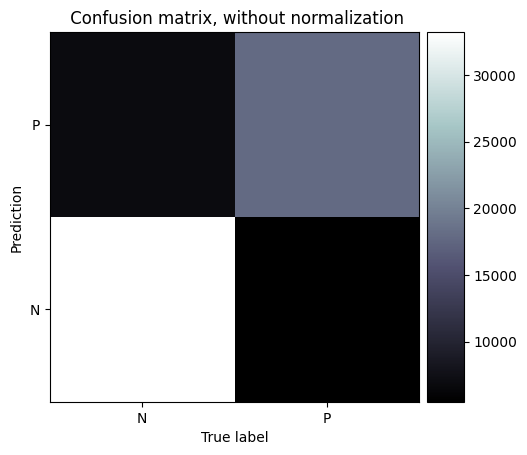

In [38]:
plot_confusion_matrix(labels_test, label_predictRFC)

## **Fig. 2.** Confusion matrix of the predicted results from the Random Forest Classifier of maximum depth 12 applied to the Higgs Bosson Kaggle data. The off-diagonal shows the number of false positive and false negative predictions the training yielded. It shows a low (very dark) amount of incorrect predictions.

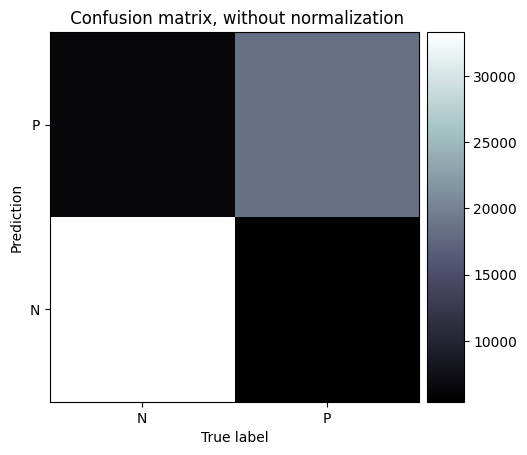

In [39]:
plot_confusion_matrix(labels_test, label_predictGBC)

## **Fig. 3.** Confusion matrix of the predicted results from the Gradient Boosting Tree Classifier of maximum depth 8 applied to the Higgs Bosson Kaggle data. The off-diagonal shows the number of false positive and false negative predictions the training yielded. It shows a low (very dark) amount of incorrect predictions.

#required for 661, EC for 461
- Use a Random Forest and a Gradiend Boosted Tree Regressor model to predict the weight of the particles. Compare the model performance on training and test setsm


In [40]:
traindata_weights, testdata_weights, train_weights, test_weights = train_test_split(higgsdata,weights, test_size=0.30, random_state=3312)

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
rfR = RandomForestRegressor(n_estimators=100, max_depth=3,
                                  random_state=0)
rfR.fit(traindata_weights, train_weights)
gbtR = GradientBoostingRegressor(n_estimators=100, max_depth=3,
                                  random_state=0)
gbtR.fit(traindata_weights, train_weights)

GradientBoostingRegressor(random_state=0)

 Calculate the L2 and L1 loss functions for the fitted regression models (see slides for the definition) and discuss the results

In [42]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
weigth_predictRF = rfR.predict(testdata_weights)
l1RF = mean_absolute_error(test_weights, weigth_predictRF)
l2RF = mean_squared_error(test_weights, weigth_predictRF)
print("L1 RF {}".format(l1RF))
print("L2 RF {}".format(l2RF))
weigth_predictGBT = gbtR.predict(testdata_weights)
l1GBT = mean_absolute_error(test_weights, weigth_predictGBT)
l2GBT = mean_squared_error(test_weights, weigth_predictGBT)
print("L1 GBT {}".format(l1GBT))
print("L2 GBT {}".format(l2GBT))

# L1 GBT 53154.297722502015

L1 RF 0.9678709767927669
L2 RF 1.7258741862037232
L1 GBT 0.8067433133350147
L2 GBT 1.301706876857004


# Choose between feature importance and grid optimization (both 461 and 661)

- For the Random Forest classifier, find the 4 most important features based on the simple unoptimized model you created earlier on. Use the documentation to find out what they are. We have not talked abotu the physics of this problem at all but the Kaggle challenge description should provide enogh information for you to comment on this result is somewhat superficially.

You can use ```rf.feature_importance_``` on the trained model to extract the relative importance of each feature (a number from 0 to 1) and then choose the features that have the 4 highest numbers (the numpy function ```argsort()``` is helpful here!)







- Explore the parameter space with the sklearn module ```sklearn.model_selection.RandomizedSearchCV``` *fitting only those 4 features*

Follow this example to set up the parameter search. Set the estimators to 10 and 100, (the number of trees) and the max depth to 3, and 10, and None (let it be unconstrained). Set bootstrap to both True and False. Set the number of features to consider at every split to both "autp" and "sqrt". Use ```pprint``` like I did earlier in this notebook to print the parameters set

**this takes some computational time! so do not start this at the last minute!!**

In [43]:
random_grid = {
    'max_depth': [3, 10, None],
    'max_features': ['auto', 'sqrt'],
    'n_estimators': [10, 100, 1000]}
print(random_grid)

{'max_depth': [3, 10, None], 'max_features': ['auto', 'sqrt'], 'n_estimators': [10, 100, 1000]}


In [44]:
best_features_index = rfc.feature_importances_
best_features_index = np.flip(best_features_index)
best_features_index = argsort(best_features_index)[0:4]

 mine and your best features do not necessarily have to be the same because our models may be different (different parameters, different random seed etc)

In [45]:
higgsdata.iloc[:, best_features_index]

,DER_deltar_tau_lep,DER_pt_ratio_lep_tau,DER_mass_vis,PRI_jet_all_pt
0,3.064,1.582,97.827,113.497
1,3.473,0.879,103.235,46.226
3,3.310,2.354,80.943,-0.000
4,3.891,1.056,134.805,0.000
5,1.362,0.588,59.149,193.660
...,...,...,...,...
249991,2.484,0.629,88.989,70.969
249993,3.102,1.354,66.781,546.066
249994,2.318,1.393,62.824,174.176
249997,2.390,1.202,75.839,41.992


In [46]:
from sklearn.model_selection import RandomizedSearchCV
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation,
# search across 18 different combinations
random_search = RandomizedSearchCV(estimator = rf, param_distributions=random_grid,
                                   n_iter=1, cv=3)


Note that this may take a long time! It took 1 hour for me to run this. Dont start at the last minute!!

In [47]:
random_search.fit(data_train.iloc[:, best_features_index], labels_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
                   n_iter=1,
                   param_distributions={'max_depth': [3, 10, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [10, 100, 1000]})

In [50]:
print("Tuned RF  Parameters: {}".format(random_search.best_params_))
print("Best score is {:.2f}".format(random_search.score(data_test.iloc[:, best_features_index], labels_test)))


Tuned RF  Parameters: {'n_estimators': 10, 'max_features': 'auto', 'max_depth': 10}
Best score is 0.74


In [51]:
df = pd.DataFrame(random_search.cv_results_)

In [52]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,2.400578,0.41691,0.221246,0.053626,10,auto,10,"{'n_estimators': 10, 'max_features': 'auto', '...",0.741525,0.742132,0.744943,0.742867,0.001489,1


Plot a simple 3-point ROC curve for the model with the best parameters found in the previous step. Describe it.

In [62]:
rf = RandomForestClassifier(max_depth=10, n_estimators=10, max_features='auto')
rf.fit(data_train.iloc[:, best_features_index], labels_train == 's')
# rf.fit(data_train, labels_train.values.flatten()=="s", max_depth = 10, n_estimators = 10,max_features =  'sqrt')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=10, max_features='auto', n_estimators=10)

In [63]:
labels_train.shape

(148320,)

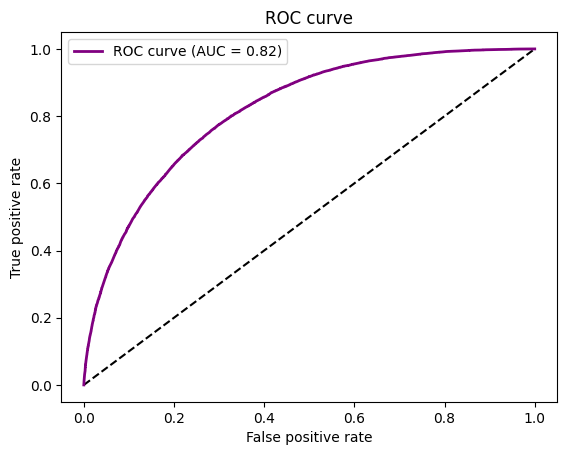

In [65]:
# The random forest model by itself
from sklearn.metrics import roc_curve, auc
y_pred_grd_rfcat = rf.predict_proba(data_test.iloc[:, best_features_index])[:, 1]

# train_labels = (labels_train.values.flatten() == "s")

fpr_rf, tpr_rf, _ = roc_curve(labels_test=="s", y_pred_grd_rfcat)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
# plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_rf, tpr_rf, color='purple', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


### **Fig. 4.** Receiver Operating Characteristic curve (ROC) and Area Under the Curve measure for predicting signals from the Kaggle Higgs Bosson data set. The curve suggests that the optimal threshold for discrimination of signal versus background (assuming that the number of false positives is to be minimized) is close to a true positive rate of 0.75 and a false positive rate of 0.30. The area under the curve is 0.82 which suggests that the model is performing better than a random model.
